In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Calculate RSSI

In [18]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Trunacate Vectors

In [4]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [5]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [6]:
dataWithOutInterference = getData("./nothing1.cfile")

In [7]:
dataWithOutInterference2 = getData("./nothing2.cfile")

In [8]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [9]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [11]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [14]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Remove No Obstruction

In [ ]:
dataWithInterferenceLOSCenterCleaned = dataWithInterferenceLOSCenter - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned = dataWithInterferenceLOSFirstQuartile - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned = dataWithInterferenceLOSThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceLOSCenterCleaned2 = dataWithInterferenceLOSCenter2 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned2 = dataWithInterferenceLOSFirstQuartile2 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned2 = dataWithInterferenceLOSThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceLOSCenterCleaned4 = dataWithInterferenceLOSCenter4 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned4 = dataWithInterferenceLOSFirstQuartile4 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned4 = dataWithInterferenceLOSThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned = dataWithInterferenceNLOSLeftCenter - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned = dataWithInterferenceNLOSLeftFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned = dataWithInterferenceNLOSLeftThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned2 = dataWithInterferenceNLOSLeftCenter2 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned2 = dataWithInterferenceNLOSLeftFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned2 = dataWithInterferenceNLOSLeftThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned4 = dataWithInterferenceNLOSLeftCenter4 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned4 = dataWithInterferenceNLOSLeftFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned4 = dataWithInterferenceNLOSLeftThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned = dataWithInterferenceNLOSRightCenter - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned = dataWithInterferenceNLOSRightFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned = dataWithInterferenceNLOSRightThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned2 = dataWithInterferenceNLOSRightCenter2 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned2 = dataWithInterferenceNLOSRightFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned2 = dataWithInterferenceNLOSRightThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned4 = dataWithInterferenceNLOSRightCenter4 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned4 = dataWithInterferenceNLOSRightFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned4 = dataWithInterferenceNLOSRightThirdQuartile4 - dataWithOutInterference

### Cleaning

#### Removing DC Offset

In [18]:
dataWithOutInterferenceDC = dataWithOutInterference - np.mean(dataWithOutInterference)
dataWithOutInterference2DC = dataWithOutInterference2 - np.mean(dataWithOutInterference2)

In [19]:
dataWithInterferenceLOSCenterDC = dataWithInterferenceLOSCenter - np.mean(dataWithInterferenceLOSCenter)
dataWithInterferenceLOSFirstQuartileDC = dataWithInterferenceLOSFirstQuartile - np.mean(dataWithInterferenceLOSFirstQuartile)
dataWithInterferenceLOSThirdQuartileDC = dataWithInterferenceLOSThirdQuartile - np.mean(dataWithInterferenceLOSThirdQuartile)

dataWithInterferenceNLOSLeftCenterDC = dataWithInterferenceNLOSLeftCenter - np.mean(dataWithInterferenceNLOSLeftCenter)
dataWithInterferenceNLOSLeftFirstQuartileDC = dataWithInterferenceNLOSLeftFirstQuartile - np.mean(dataWithInterferenceNLOSLeftFirstQuartile)
dataWithInterferenceNLOSLeftThirdQuartileDC = dataWithInterferenceNLOSLeftThirdQuartile - np.mean(dataWithInterferenceNLOSLeftThirdQuartile)

dataWithInterferenceNLOSRightCenterDC = dataWithInterferenceNLOSRightCenter - np.mean(dataWithInterferenceNLOSRightCenter)
dataWithInterferenceNLOSRightFirstQuartileDC = dataWithInterferenceNLOSRightFirstQuartile - np.mean(dataWithInterferenceNLOSRightFirstQuartile)
dataWithInterferenceNLOSRightThirdQuartileDC = dataWithInterferenceNLOSRightThirdQuartile - np.mean(dataWithInterferenceNLOSRightThirdQuartile)

In [20]:
dataWithInterferenceLOSCenter2DC = dataWithInterferenceLOSCenter2 - np.mean(dataWithInterferenceLOSCenter2)
dataWithInterferenceLOSFirstQuartile2DC = dataWithInterferenceLOSFirstQuartile2 - np.mean(dataWithInterferenceLOSFirstQuartile2)
dataWithInterferenceLOSThirdQuartile2DC = dataWithInterferenceLOSThirdQuartile2 - np.mean(dataWithInterferenceLOSThirdQuartile2)

dataWithInterferenceNLOSLeftCenter2DC = dataWithInterferenceNLOSLeftCenter2 - np.mean(dataWithInterferenceNLOSLeftCenter2)
dataWithInterferenceNLOSLeftFirstQuartile2DC = dataWithInterferenceNLOSLeftFirstQuartile2 - np.mean(dataWithInterferenceNLOSLeftFirstQuartile2)
dataWithInterferenceNLOSLeftThirdQuartile2DC = dataWithInterferenceNLOSLeftThirdQuartile2 - np.mean(dataWithInterferenceNLOSLeftThirdQuartile2)

dataWithInterferenceNLOSRightCenter2DC = dataWithInterferenceNLOSRightCenter2 - np.mean(dataWithInterferenceNLOSRightCenter2)
dataWithInterferenceNLOSRightFirstQuartile2DC = dataWithInterferenceNLOSRightFirstQuartile2 - np.mean(dataWithInterferenceNLOSRightFirstQuartile2)
dataWithInterferenceNLOSRightThirdQuartile2DC = dataWithInterferenceNLOSRightThirdQuartile2 - np.mean(dataWithInterferenceNLOSRightThirdQuartile2)

In [22]:

dataWithInterferenceLOSCenter4DC = dataWithInterferenceLOSCenter4 - np.mean(dataWithInterferenceLOSCenter4)
dataWithInterferenceLOSFirstQuartile4DC = dataWithInterferenceLOSFirstQuartile4 - np.mean(dataWithInterferenceLOSFirstQuartile4)
dataWithInterferenceLOSThirdQuartile4DC = dataWithInterferenceLOSThirdQuartile4 - np.mean(dataWithInterferenceLOSThirdQuartile4)

dataWithInterferenceNLOSLeftCenter4DC = dataWithInterferenceNLOSLeftCenter4 - np.mean(dataWithInterferenceNLOSLeftCenter4)
dataWithInterferenceNLOSLeftFirstQuartile4DC = dataWithInterferenceNLOSLeftFirstQuartile4 - np.mean(dataWithInterferenceNLOSLeftFirstQuartile4)
dataWithInterferenceNLOSLeftThirdQuartile4DC = dataWithInterferenceNLOSLeftThirdQuartile4 - np.mean(dataWithInterferenceNLOSLeftThirdQuartile4)

dataWithInterferenceNLOSRightCenter4DC = dataWithInterferenceNLOSRightCenter4 - np.mean(dataWithInterferenceNLOSRightCenter4)
dataWithInterferenceNLOSRightFirstQuartile4DC = dataWithInterferenceNLOSRightFirstQuartile4 - np.mean(dataWithInterferenceNLOSRightFirstQuartile4)
dataWithInterferenceNLOSRightThirdQuartile4DC = dataWithInterferenceNLOSRightThirdQuartile4 - np.mean(dataWithInterferenceNLOSRightThirdQuartile4)

MemoryError: Unable to allocate 1.56 GiB for an array with shape (210022330,) and data type complex64

#### Creating Equal Size Vectors

In [17]:
Vectors_Raw1 = [
    calculate_IQMagnitude(dataWithOutInterference),
    calculate_IQMagnitude(dataWithOutInterference2), 
    
    calculate_IQMagnitude(dataWithInterferenceLOSCenter),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile), 
]

In [18]:
Vectors_Raw2 = [
    calculate_IQMagnitude(dataWithInterferenceLOSCenter2),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile2), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile2), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile2), 
]

In [19]:
Vectors_Raw4 = [
    calculate_IQMagnitude(dataWithInterferenceLOSCenter4),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile4), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile4), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile4), 
]

In [20]:
Vectors_Raw = (Vectors_Raw1 + Vectors_Raw2 +  Vectors_Raw4)

In [36]:
for i, vec in enumerate(Vectors_Raw):
    print(f"Vector {i}: Type: {type(vec)}, Length: {len(vec) if hasattr(vec, '__len__') else 'N/A'}")


Vector 0: Type: <class 'numpy.float32'>, Length: N/A
Vector 1: Type: <class 'numpy.float32'>, Length: N/A
Vector 2: Type: <class 'numpy.float32'>, Length: N/A
Vector 3: Type: <class 'numpy.float32'>, Length: N/A
Vector 4: Type: <class 'numpy.float32'>, Length: N/A
Vector 5: Type: <class 'numpy.float32'>, Length: N/A
Vector 6: Type: <class 'numpy.float32'>, Length: N/A
Vector 7: Type: <class 'numpy.float32'>, Length: N/A
Vector 8: Type: <class 'numpy.float32'>, Length: N/A
Vector 9: Type: <class 'numpy.float32'>, Length: N/A
Vector 10: Type: <class 'numpy.float32'>, Length: N/A
Vector 11: Type: <class 'numpy.float32'>, Length: N/A
Vector 12: Type: <class 'numpy.float32'>, Length: N/A
Vector 13: Type: <class 'numpy.float32'>, Length: N/A
Vector 14: Type: <class 'numpy.float32'>, Length: N/A
Vector 15: Type: <class 'numpy.float32'>, Length: N/A
Vector 16: Type: <class 'numpy.float32'>, Length: N/A
Vector 17: Type: <class 'numpy.float32'>, Length: N/A
Vector 18: Type: <class 'numpy.float32

In [21]:
Vectors = truncate_vectors_to_same_size(*Vectors_Raw)

# Map back truncated vectors to their variables
(
    WithOutInterference,
    WithOutInterference2,

    NLOSLeftFirstQuartile,
    NLOSLeftCenter,
    NLOSLeftThirdQuartile,
    LOSFirstQuartile,
    LOSCenter,
    LOSThirdQuartile,
    NLOSRightFirstQuartile,
    NLOSRightCenter,
    NLOSRightThirdQuartile,

    LOSFirstQuartile2,
    LOSCenter2,

    NLOSLeftFirstQuartile2,
    NLOSLeftCenter2,
    NLOSLeftThirdQuartile2,
    LOSThirdQuartile2,
    NLOSRightFirstQuartile2,
    NLOSRightCenter2,
    NLOSRightThirdQuartile2,

    NLOSLeftFirstQuartile4,
    NLOSLeftCenter4,
    NLOSLeftThirdQuartile4,
    LOSFirstQuartile4,
    LOSCenter4,
    LOSThirdQuartile4,
    NLOSRightFirstQuartile4,
    NLOSRightCenter4,
    NLOSRightThirdQuartile4,
    
) = Vectors

#### Without Obstruction Removal

In [22]:
WithOutInterference_Array = np.array([WithOutInterference, WithOutInterference2])
WithOutInterference_Mean_Array = np.mean(WithOutInterference_Array, axis=0)

In [23]:
NLOSLeftFirstQuartile_Cleaned = NLOSLeftFirstQuartile - WithOutInterference_Mean_Array
NLOSLeftCenter_Cleaned = NLOSLeftCenter - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile_Cleaned = NLOSLeftThirdQuartile - WithOutInterference_Mean_Array
LOSFirstQuartile_Cleaned = LOSFirstQuartile - WithOutInterference_Mean_Array
LOSCenter_Cleaned = LOSCenter - WithOutInterference_Mean_Array
LOSThirdQuartile_Cleaned = LOSThirdQuartile - WithOutInterference_Mean_Array
NLOSRightFirstQuartile_Cleaned = NLOSRightFirstQuartile - WithOutInterference_Mean_Array
NLOSRightCenter_Cleaned = NLOSRightCenter - WithOutInterference_Mean_Array
NLOSRightThirdQuartile_Cleaned  = NLOSRightThirdQuartile - WithOutInterference_Mean_Array

In [24]:
LOSFirstQuartile2_Cleaned = LOSFirstQuartile2 - WithOutInterference_Mean_Array
LOSCenter2_Cleaned = LOSCenter2 - WithOutInterference_Mean_Array
NLOSLeftFirstQuartile2_Cleaned = NLOSLeftFirstQuartile2 - WithOutInterference_Mean_Array
NLOSLeftCenter2_Cleaned = NLOSLeftCenter2 - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile2_Cleaned = NLOSLeftThirdQuartile2 - WithOutInterference_Mean_Array
LOSThirdQuartile2_Cleaned = LOSThirdQuartile2 - WithOutInterference_Mean_Array
NLOSRightFirstQuartile2_Cleaned = NLOSRightFirstQuartile2 - WithOutInterference_Mean_Array
NLOSRightCenter2_Cleaned = NLOSRightCenter2 - WithOutInterference_Mean_Array
NLOSRightThirdQuartile2_Cleaned = NLOSRightThirdQuartile2 - WithOutInterference_Mean_Array

In [25]:
NLOSLeftFirstQuartile4_Cleaned = NLOSLeftFirstQuartile4 - WithOutInterference_Mean_Array
NLOSLeftCenter4_Cleaned = NLOSLeftCenter4 - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile4_Cleaned = NLOSLeftThirdQuartile4 - WithOutInterference_Mean_Array
LOSFirstQuartile4_Cleaned = LOSFirstQuartile4 - WithOutInterference_Mean_Array
LOSCenter4_Cleaned = LOSCenter4 - WithOutInterference_Mean_Array
LOSThirdQuartile4_Cleaned = LOSThirdQuartile4 - WithOutInterference_Mean_Array
NLOSRightFirstQuartile4_Cleaned = NLOSRightFirstQuartile4 - WithOutInterference_Mean_Array
NLOSRightCenter4_Cleaned = NLOSRightCenter4 - WithOutInterference_Mean_Array
NLOSRightThirdQuartile4_Cleaned = NLOSRightThirdQuartile4 - WithOutInterference_Mean_Array

#### Mean of Vectors

In [26]:
NLOSLeftFirstQuartile_Cleaned_Array = np.array([NLOSLeftFirstQuartile_Cleaned, NLOSLeftFirstQuartile2_Cleaned, NLOSLeftFirstQuartile4_Cleaned])
NLOSLeftFirstQuartile_Cleaned_Mean_Array = np.mean(NLOSLeftFirstQuartile_Cleaned_Array, axis=0)
NLOSLeftThirdQuartile_Cleaned_Array = np.array([NLOSLeftThirdQuartile_Cleaned, NLOSLeftThirdQuartile2_Cleaned, NLOSLeftThirdQuartile4_Cleaned])
NLOSLeftThirdQuartile_Cleaned_Mean_Array = np.mean(NLOSLeftThirdQuartile_Cleaned_Array, axis=0)
NLOSLeftCenter_Cleaned_Array = np.array([NLOSLeftCenter_Cleaned, NLOSLeftCenter2_Cleaned, NLOSLeftCenter4_Cleaned])
NLOSLeftCenter_Cleaned_Mean_Array = np.mean(NLOSLeftCenter_Cleaned_Array, axis=0)

In [27]:
NLOSRightFirstQuartile_Cleaned_Array = np.array([NLOSRightFirstQuartile_Cleaned, NLOSRightFirstQuartile2_Cleaned, NLOSRightFirstQuartile4_Cleaned])
NLOSRightFirstQuartile_Cleaned_Mean_Array = np.mean(NLOSRightFirstQuartile_Cleaned_Array, axis=0)
NLOSRightThirdQuartile_Cleaned_Array = np.array([NLOSRightThirdQuartile_Cleaned, NLOSRightThirdQuartile2_Cleaned, NLOSRightThirdQuartile4_Cleaned])
NLOSRightThirdQuartile_Cleaned_Mean_Array = np.mean(NLOSRightThirdQuartile_Cleaned_Array, axis=0)
NLOSRightCenter_Cleaned_Array = np.array([NLOSRightCenter_Cleaned, NLOSRightCenter2_Cleaned, NLOSRightCenter4_Cleaned])
NLOSRightCenter_Cleaned_Mean_Array = np.mean(NLOSRightCenter_Cleaned_Array, axis=0)

In [28]:
LOSFirstQuartile_Cleaned_Array = np.array([LOSFirstQuartile_Cleaned, LOSFirstQuartile2_Cleaned, LOSFirstQuartile4_Cleaned])
LOSFirstQuartile_Cleaned_Mean_Array = np.mean(LOSFirstQuartile_Cleaned_Array, axis=0)
LOSThirdQuartile_Cleaned_Array = np.array([LOSThirdQuartile_Cleaned, LOSThirdQuartile2_Cleaned, LOSThirdQuartile4_Cleaned])
LOSThirdQuartile_Cleaned_Mean_Array = np.mean(LOSThirdQuartile_Cleaned_Array, axis=0)
LOSCenter_Cleaned_Array = np.array([LOSCenter_Cleaned, LOSCenter2_Cleaned, LOSCenter4_Cleaned])
LOSCenter_Cleaned_Mean_Array = np.mean(LOSCenter_Cleaned_Array, axis=0)

### Evaluation

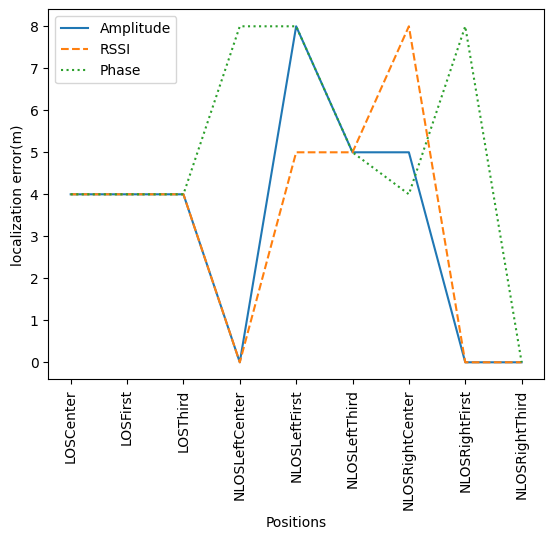

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["LOSCenter","LOSFirst","LOSThird","NLOSLeftCenter","NLOSLeftFirst","NLOSLeftThird","NLOSRightCenter","NLOSRightFirst","NLOSRightThird"]
amplitude = [4,4,4,0,8,5,5,0,0]
rssi = [4,4,4,0,5,5,8,0,0]
phase = [4,4,4,8,8,5,4,8,0]

# plot lines
plt.plot(x, amplitude, label = "Amplitude", linestyle="-")
plt.plot(x, rssi, label = "RSSI", linestyle="--")
plt.plot(x, phase, label = "Phase", linestyle=":")
plt.xlabel("Positions")
plt.ylabel("localization error(m)")
plt.xticks(range(len(x)), x, rotation='vertical')
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()

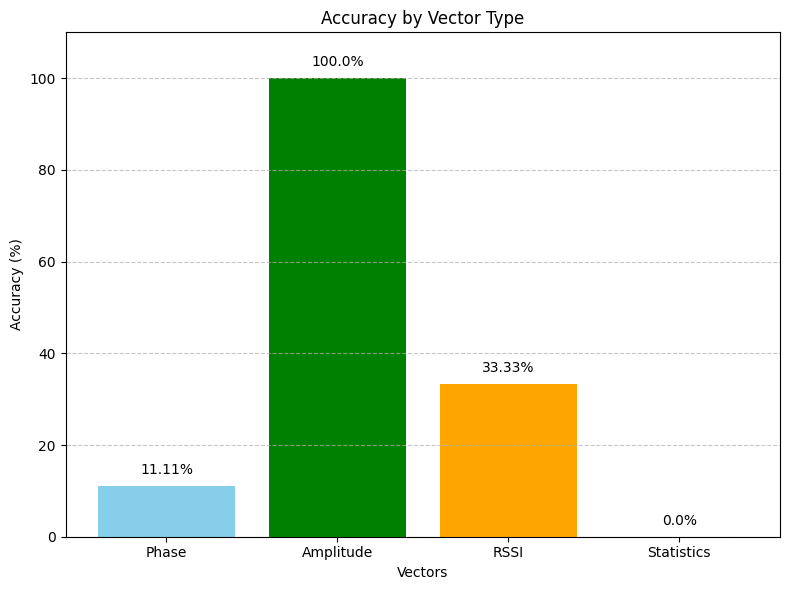

In [2]:
import matplotlib.pyplot as plt

# Data
vectors = ['Phase', 'Amplitude', 'RSSI', 'Statistics']
accuracy = [11.11, 100, 33.33, 0]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(vectors, accuracy, color=['skyblue', 'green', 'orange', 'red'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval}%', ha='center', va='bottom')

# Customize chart
plt.ylim(0, 110)
plt.ylabel('Accuracy (%)')
plt.xlabel('Vectors')
plt.title('Accuracy by Vector Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


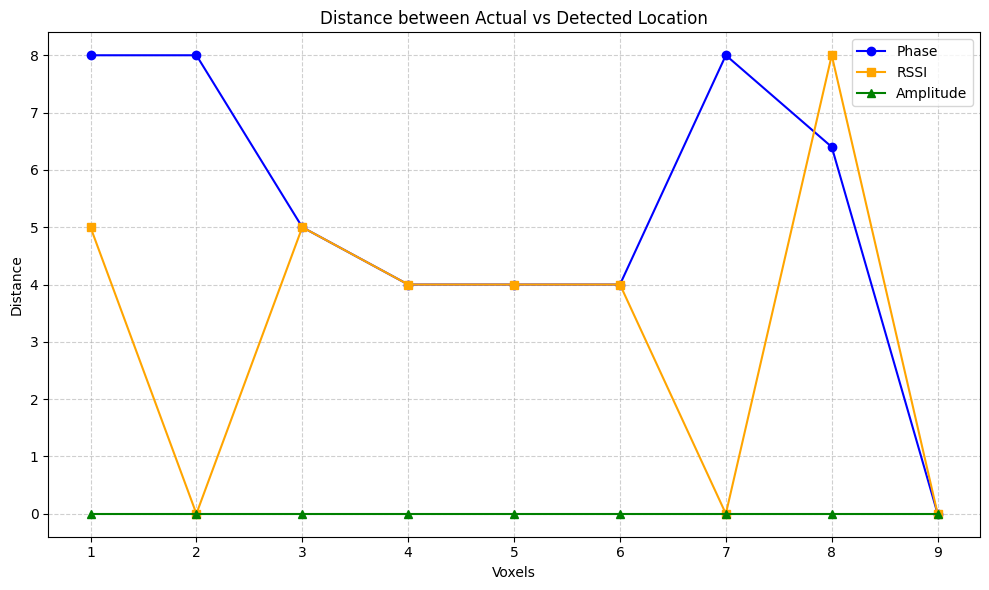

In [3]:
import matplotlib.pyplot as plt

# X-axis positions
positions = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Y-axis distances
phase = [8, 8, 5, 4, 4, 4, 8, 6.4, 0]
rssi = [5, 0, 5, 4, 4, 4, 0, 8, 0]
amplitude = [0, 0, 0, 0, 0, 0, 0, 0, 0]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(positions, phase, marker='o', label='Phase', color='blue')
plt.plot(positions, rssi, marker='s', label='RSSI', color='orange')
plt.plot(positions, amplitude, marker='^', label='Amplitude', color='green')

# Labels and title
plt.xlabel('Voxels')
plt.ylabel('Distance')
plt.title('Distance between Actual vs Detected Location')
plt.xticks(positions)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
